In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 使用Opencv读图

img_bgr的shape: (640, 480, 3)
img_gray的shape: (640, 480)


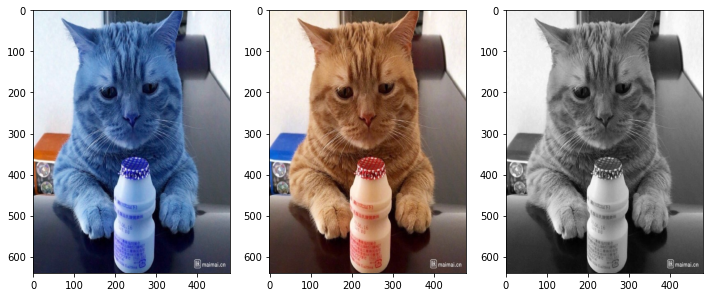

In [20]:
img_pth = "../demo_images/little_cat.jpg"
img_bgr = cv2.imread(img_pth) #使用opencv读图的结果会以BGR的顺序读入
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #将BGR图像转成RGB图像
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) #将BGR图像转成灰度图像

print(f"img_bgr的shape: {img_bgr.shape}")
print(f"img_gray的shape: {img_gray.shape}")

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 16))
axes = ax.flatten() 
axes[0].imshow(img_bgr)
axes[1].imshow(img_rgb)
axes[2].imshow(img_gray, cmap = "gray")
plt.show()

In [71]:
img_pth = "../demo_images/car.png"
img_bgr = cv2.imread(img_pth, flags=cv2.IMREAD_COLOR) #按照BGR三通道读入，即使原始图像包含RGBA四个通道，img_bgr也会仅读入BGR三通道
img_gray = cv2.imread(img_pth, flags=cv2.IMREAD_GRAYSCALE) #按照灰度图读入
img_unchanged = cv2.imread(img_pth, flags=cv2.IMREAD_UNCHANGED) #按照图像原始格式读入，灰度图读入成灰度图，RGBA读入成RGBA

print(f"img_bgr's shape: {img_bgr.shape}")
print(f"img_gray's shape: {img_gray.shape}")
print(f"img_unchanged's shape: {img_unchanged.shape}")

img_bgr's shape: (427, 640, 3)
img_gray's shape: (427, 640)
img_unchanged's shape: (427, 640, 4)


## RGB与HSV空间转换   

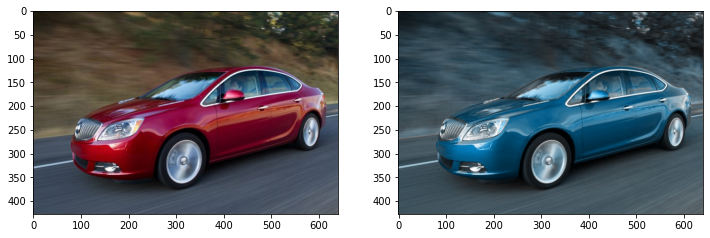

In [33]:
img_pth = "../demo_images/car.jpg"
img_bgr = cv2.imread(img_pth) #使用opencv读图的结果会以BGR的顺序读入
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #将BGR图像转成RGB图像
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV) #将BGR图像转成HSV图像

h,s,v = cv2.split(img_hsv)
h[:] = 100 #修改H通道的数值
img_hsv = cv2.merge((h,s,v))#将修改后的h、s、v通道合并成图像
img_rgb_modified = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) #转回RGB空间

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 12))
axes = ax.flatten() 
axes[0].imshow(img_rgb)
axes[1].imshow(img_rgb_modified)
plt.show()

## 图像二值化

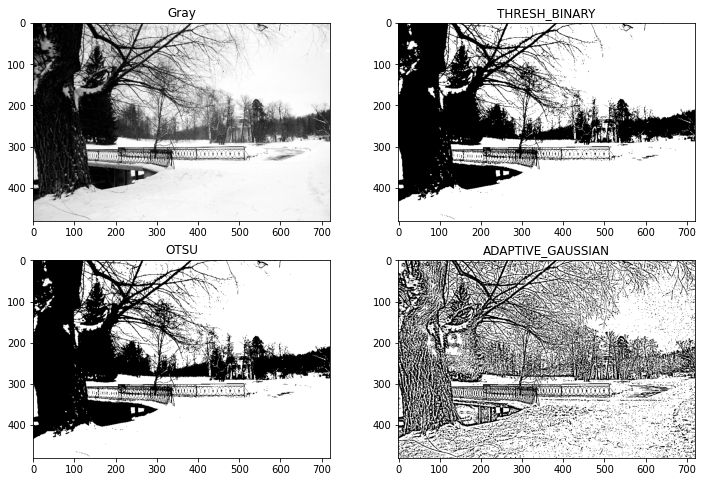

In [72]:
img = cv2.imread('../demo_images/snow.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

methods = ['Gray', 'THRESH_BINARY', 'OTSU', "ADAPTIVE_GAUSSIAN"]

# 使用固定阈值127
ret,binary_image = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) 

# 使用OTSU算法，根据图像特性，自动选择最佳的阈值
ret, otsu_img = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

# 使用自适应阈值
adaptive_img = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 8))
axes = ax.flatten() 

axes[0].imshow(img_gray, cmap = "gray")
axes[1].imshow(binary_image, cmap = "gray")
axes[2].imshow(otsu_img, cmap = "gray")
axes[3].imshow(adaptive_img, cmap = "gray")


for idx, method in enumerate(methods):
    axes[idx].set_title(method)

plt.show()



## 滤波器

In [106]:
def add_salt_to_img(img: np.array, n: int) -> np.array:  
    '''对图像添加椒盐噪声
    
    输入一张图像，对图像添加n个椒盐噪声点。
    Args: 
        img: RGB图像或者灰度图像
        n: 椒盐数目
    Return:
        返回添加椒盐噪声后的图像
    '''  
    img_copy = img.copy()
    for k in range(n):    
        i = int(np.random.random() * img_copy.shape[1])
        j = int(np.random.random() * img_copy.shape[0])
        if img_copy.ndim == 2:     
            img_copy[j,i] = 255    
        elif img_copy.ndim == 3:     
            img_copy[j,i,0]= 255    
            img_copy[j,i,1]= 255    
            img_copy[j,i,2]= 255    
    return img_copy   


def add_pepper_to_img(img: np.array, n: int) -> np.array: 
    '''对图像添加胡椒噪声
    
    输入一张图像，对图像添加n个胡椒噪声点。
    Args: 
        img: RGB图像或者灰度图像
        n: 胡椒数目
    Return:
        返回添加胡椒噪声后的图像
    '''  
    img_copy = img.copy()
    for k in range(n):
        i = int(np.random.random() * img_copy.shape[1])
        j = int(np.random.random() * img_copy.shape[0])
        if img_copy.ndim == 2:
            img_copy[j, i] == 0
        elif img_copy.ndim == 3:
            img_copy[j,i,0]= 0    
            img_copy[j,i,1]= 0    
            img_copy[j,i,2]= 0
    return img_copy

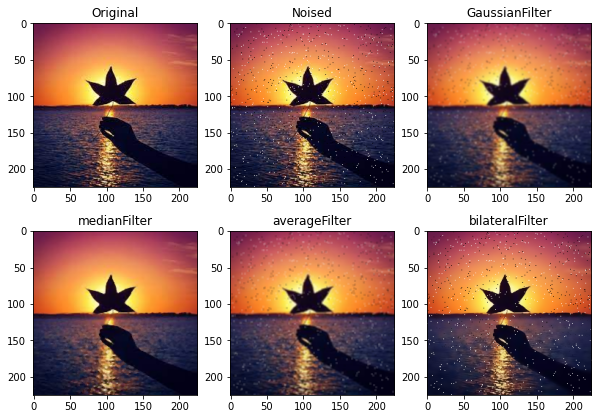

In [107]:
img_bgr = cv2.imread('../demo_images/scene.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_noise = add_salt_to_img(img_rgb, 500)
img_noise = add_pepper_to_img(img_noise, 500)

methods = ["Original", "Noised", "GaussianFilter", "medianFilter", "averageFilter", "bilateralFilter"]

img_gaussian_filtered = cv2.GaussianBlur(img_noise, (5,5), 0)
img_median_filtered = cv2.medianBlur(img_noise, 3)
img_average_filtered = cv2.blur(img_noise, (3,3))
img_bilateral_filtered = cv2.bilateralFilter(img_noise, 9, 75, 75) 

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(10, 7))
axes = ax.flatten() 

axes[0].imshow(img_rgb)
axes[1].imshow(img_noise)
axes[2].imshow(img_gaussian_filtered)
axes[3].imshow(img_median_filtered)
axes[4].imshow(img_average_filtered)
axes[5].imshow(img_bilateral_filtered)

for idx, method in enumerate(methods):
    axes[idx].set_title(method)

plt.show()